In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import gym
import random

In [7]:
streets = gym.make("Taxi-v3").env
initial_state = streets.encode(4, 3, 3, 1)
env.reset()
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [8]:
action_size = env.action_space.n
state_size = env.observation_space.n
print("Action space size: ", action_size)
print("State space size: ", state_size)

Action space size:  6
State space size:  500


In [9]:
Q = np.zeros((state_size, action_size))

In [10]:
train_episodes = 2000         # Total train episodes
test_episodes = 100           # Total test episodes
max_steps = 100               # Max steps per episode
alpha = 0.7                   # Learning rate
gamma = 0.618                 # Discounting rate

epsilon = 1                   # Exploration rate
max_epsilon = 1               # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [11]:
training_rewards = []   # list of rewards

for episode in range(train_episodes):
    state = env.reset()    # Reset the environment
    cumulative_training_rewards = 0
    
    for step in range(max_steps):
        # Choose an action (a) among the possible states (s)
        exp_exp_tradeoff = random.uniform(0, 1)   # choose a random number
        
        # If this number > epsilon, select the action corresponding to the biggest Q value for this state (Exploitation)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(Q[state,:])        
        # Else choose a random action (Exploration)
        else:
            action = env.action_space.sample()
        
        # Perform the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update the Q table using the Bellman equation: Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[new_state, :]) - Q[state, action]) 
        cumulative_training_rewards += reward  # increment the cumulative reward        
        state = new_state         # Update the state
        
        # If we reach the end of the episode
        if done == True:
            print ("Cumulative reward for episode {}: {}".format(episode, cumulative_training_rewards))
            break
    
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    
    # append the episode cumulative reward to the list
    training_rewards.append(cumulative_training_rewards)

print ("Training score over time: " + str(sum(training_rewards)/train_episodes))

Cumulative reward for episode 57: -311
Cumulative reward for episode 58: -175
Cumulative reward for episode 77: -148
Cumulative reward for episode 78: -203
Cumulative reward for episode 94: -157
Cumulative reward for episode 95: -241
Cumulative reward for episode 100: -163
Cumulative reward for episode 101: -165
Cumulative reward for episode 102: -62
Cumulative reward for episode 111: -38
Cumulative reward for episode 118: -97
Cumulative reward for episode 119: -95
Cumulative reward for episode 121: -110
Cumulative reward for episode 129: -72
Cumulative reward for episode 133: -113
Cumulative reward for episode 136: -18
Cumulative reward for episode 137: -122
Cumulative reward for episode 138: -30
Cumulative reward for episode 141: -49
Cumulative reward for episode 143: -88
Cumulative reward for episode 145: -62
Cumulative reward for episode 146: -88
Cumulative reward for episode 152: -38
Cumulative reward for episode 154: -24
Cumulative reward for episode 159: -104
Cumulative reward f

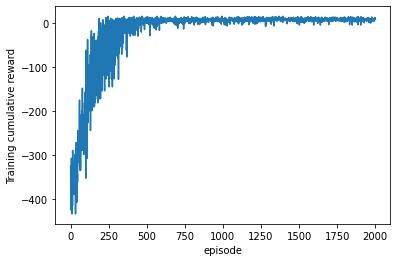

In [12]:
x = range(train_episodes)
plt.plot(x, training_rewards)
plt.xlabel('episode')
plt.ylabel('Training cumulative reward')
plt.show()

In [13]:
test_rewards = []

for episode in range(test_episodes):
    state = env.reset()
    cumulative_test_rewards = 0
    frames = []
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state,:])        
        new_state, reward, done, info = env.step(action)
        cumulative_test_rewards += reward
        state = new_state
        
        if done:
            print ("Cumulative reward for episode {}: {}".format(episode, cumulative_test_rewards))
            break
    test_rewards.append(cumulative_test_rewards)
    
env.close()
print ("Test score over time: " + str(sum(test_rewards)/test_episodes))

****************************************************
EPISODE  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+----